In [1]:
import cv2 as cv
import glob

from matplotlib import pyplot as plt
from os import path

%matplotlib inline

In [2]:
print('Using OpenCV version', cv.__version__)

Using OpenCV version 3.1.0


In [3]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

In [4]:
img = cv.imread('selfie.jpg')

In [5]:
grayscale_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
detected_faces = face_cascade.detectMultiScale(grayscale_img, 1.3, 5)

for x, y, width, height in detected_faces:
    # Draw rectangle around face.
    cv.rectangle(img, (x, y), (x + width, y + height), (0, 0, 255), 8)

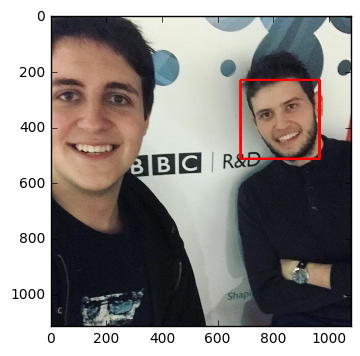

In [6]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [9]:
def print_results(img_path, detected_faces):    
    # Replace 'image-example.jpg' with 'image-example.txt'.
    output_path = img_path[:-4] + '.txt' 
    
    with open(output_path, 'w') as f:
        img_name = path.basename(img_path)
        print(img_name, file=f)
        print(len(detected_faces), file=f)

        for x, y, width, height in detected_faces:
            print(x, y, x + width, y + height, file=f)

In [10]:
# Get and normalize file paths.
img_paths = [path.normpath(p) for p in glob.iglob('data/WIDER_test/images/**/*.jpg',
                                                  recursive=True)]
batch_size = 100

for img_path in img_paths[:batch_size]:
    img = cv.imread(img_path)
    grayscale_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    detected_faces = face_cascade.detectMultiScale(grayscale_img, 1.3, 5)
    print_results(img_path, detected_faces)